In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [49]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [50]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [51]:
df.shape

(238, 16)

### Task 1: Single Linear Regression

In [52]:
lm = LinearRegression()
lm

LinearRegression()

In [53]:
X = df[['CPU_frequency']]
y = df['Price']
lm.fit(X, y)
y_pred = lm.predict(X)
y_pred[:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

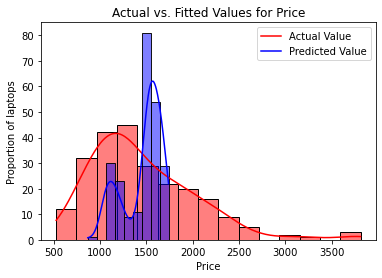

In [54]:
ax1 = sns.histplot(df['Price'], color='r', discrete=False, kde=True)
sns.histplot(y_pred, color='b', discrete=False, kde=True)
plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [55]:
mse_slr = mean_squared_error(df['Price'], y_pred)
print('MSE: ', mse_slr)
r2_slr = r2_score(df['Price'], y_pred)
print('R2: ', r2_slr)

MSE:  284583.4405868629
R2:  0.1344436321024326


### Task 2 - Multiple Linear Regression

In [56]:
mlm = LinearRegression()
X = df[['RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df['Price']
mlm.fit(X, y)
y_pred = mlm.predict(X)

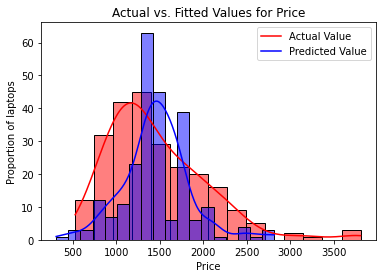

In [57]:
ax1 = sns.histplot(df['Price'], color='r', discrete=False, kde=True)
sns.histplot(y_pred, color='b', discrete=False, kde=True)
plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [58]:
mse_mlr = mean_squared_error(df['Price'], y_pred)
print('MSE: ', mse_mlr)
r2_mlr = r2_score(df['Price'], y_pred)
print('R2: ', r2_mlr)

MSE:  177267.691875997
R2:  0.4608429105735675


### Task 3 - Polynomial Regression

In [59]:
X = df[['CPU_frequency']].to_numpy().flatten()
Y = df['Price'].to_numpy().flatten()

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [60]:
def plot_poly(model, independent_var, dependent_var, name):
    x_new = np.linspace(independent_var.min(), independent_var.max(), 100)
    y_new = model(x_new)
    plt.plot(independent_var, dependent_var, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price: {name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of laptops')

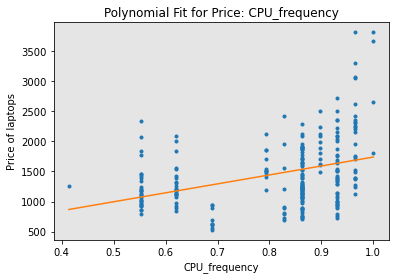

In [61]:
plot_poly(p1, X, Y, 'CPU_frequency')

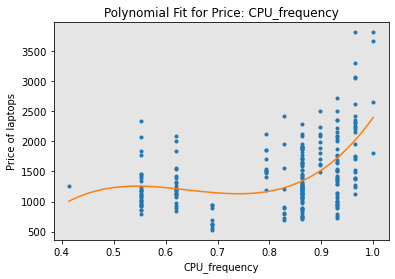

In [62]:
plot_poly(p3, X, Y, 'CPU_frequency')

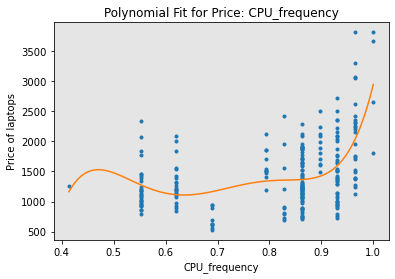

In [63]:
plot_poly(p5, X, Y, 'CPU_frequency')

In [64]:
print('R2 for p1: ', r2_score(Y, p1(X)))
print('MSE for p1: ', mean_squared_error(Y, p1(X)))
print('R2 for p3: ', r2_score(Y, p3(X)))
print('MSE for p3: ', mean_squared_error(Y, p3(X)))
print('R2 for p5: ', r2_score(Y, p5(X)))
print('MSE for p5: ', mean_squared_error(Y, p5(X)))

R2 for p1:  0.1344436321024326
MSE for p1:  284583.4405868629
R2 for p3:  0.2669264079653113
MSE for p3:  241024.86303848765
R2 for p5:  0.3030822706443915
MSE for p5:  229137.29548053455


### Task 4 - Pipeline

In [65]:
X = df[['CPU_frequency']]
input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(input)
X = X.astype(float)
pipe.fit(X,Y)
ypipe = pipe.predict(X)